# Loading Package

- "Mock_Data_Processing_for_Training": Data processing
- "ML_Training": training in 6 $\sigma$ region
- "Calculate_Chi_Square": calculate $\chi^2$
- "Select_Sample": select data in 1, 2, 3, 6 $\sigma$ region
- "Create_Pseudodata": create pseudodata 

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals
# basic python package
import importlib
import numpy as np
import time
import logging
importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

# python ploting packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


# self-define classes
from script import CR_ML_Class as CR
from script import load_mock_data as LD


# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
print("Tensorflow Version is {}".format(tf.__version__))
print("Keras Version is {}".format(tf.keras.__version__))

Tensorflow Version is 2.4.1
Keras Version is 2.4.0


## Load Mock Data
### Data Descript

```
para : propagation and source parameters 
numpy shape: (# of mock data, 14)
#parameter: original parameter 
#new_parameter: recalculate the normal factor and Ap 

raw1=D_0, 
raw2=\delta, 
raw3=z_h, 
raw4=v_A, 
raw5=\eta, 
raw6=A_p, 
raw7=\nu_1, 
raw8=\nu_2, 
raw9=log10(R_{br,1}), 
raw10=\nu_3, 
raw11=log10(R_{br,2}), 
raw12=N_{Li}, 
raw13=N_{Be}, 
raw14=N_{O}


data: Mock data
numpy shape: (# of mock data, 84, 6)
84 means there are 84 energy bins from 1.000e-03 to 1.105e+05
6 means there are the spectrum for E, Li, Be, B, C, O
#data_0: original mocak data
#modify_data_0: reshape data accroding to recalculated parameters


chi: chi-square 
numpy shape: (# of mock data)
#new_chi: chi-square from "modify_data"

```

### Data Space
#### All mock data which are transformed to numpy format are stored in folder "Numpy_mock_data"
```
0 means the first run mock data, it contains 223365 data
1 means the second run mock data, it contains 86080 data
2 means the third run mock data, it contains 5000 data
```


In [30]:
%%time
importlib.reload(LD)

origin_para = ["parameter_0.npy"]#,"parameter_1.npy","parameter_2.npy","parameter_3.npy","parameter_4.npy"]
new_para = ["new_parameter_0.npy"]#,"new_parameter_1.npy","new_parameter_2.npy","new_parameter_3.npy","new_parameter_4.npy"]
mock_data = ["data_0.npy"]#,"data_1.npy","data_2.npy","data_3.npy","data_4.npy"]
chi_square = ["new_chi_0.npy"]#,"new_chi_1.npy","new_chi_2.npy","new_chi_3.npy","new_chi_4.npy"]

load_data = LD.load_mock_data(origin_para = origin_para, new_para = new_para, mock_data = mock_data, chi_square = chi_square, mock_data_path="../Data/Numpy_mock_data/")

parameter, data, chi = load_data.parameter, load_data.data, load_data.chisq

INFO:root:Now loading...
INFO:root:1/1
INFO:root:There are 223365 data 
INFO:root:Finish


CPU times: user 1.17 s, sys: 2.24 s, total: 3.41 s
Wall time: 3.92 s


## Select Data in $6\sigma$  Region
### Using "Select_Sample" package to slsect data in 1 $\sigma$, 2 $\sigma$, 3 $\sigma$ and 6 $\sigma$ rigion
#### where 1(2, 3, 6) $\sigma$ means the min($\chi^2$)+15.94(24.03, 33.20, 70)
#### here, min($\chi^2$)=347.73


In [6]:
%%time
importlib.reload(CR)
chi_para, chi_data, chi_sele = parameter,data,chi #mock_0.new_parameter[:], mock_0.data[:], chi_0[:]

para_1_sigma, data_1_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,1).Sample()
para_2_sigma, data_2_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,2).Sample()
para_3_sigma, data_3_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,3).Sample()
para_4_sigma, data_4_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,4).Sample()
para_5_sigma, data_5_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,5).Sample()
para_6_sigma, data_6_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,6).Sample()

INFO:root:There are 2226 data in the 1 \sigma region.
INFO:root:Time consumption : 0.0038 min
INFO:root:There are 6600 data in the 2 \sigma region.
INFO:root:Time consumption : 0.0044 min
INFO:root:There are 13970 data in the 3 \sigma region.
INFO:root:Time consumption : 0.0055 min
INFO:root:There are 24700 data in the 4 \sigma region.
INFO:root:Time consumption : 0.0076 min
INFO:root:There are 39055 data in the 5 \sigma region.
INFO:root:Time consumption : 0.0096 min
INFO:root:There are 57252 data in the 6 \sigma region.
INFO:root:Time consumption : 0.0137 min


CPU times: user 2.4 s, sys: 309 ms, total: 2.71 s
Wall time: 2.7 s


In [7]:
%%time
para_3_sigma_ = para_3_sigma[np.where(para_3_sigma[:,2] < 5)]

CPU times: user 873 µs, sys: 3.83 ms, total: 4.7 ms
Wall time: 3.03 ms


In [8]:
para_3_sigma_[:,2]

array([4.9425, 4.6925, 4.8311, ..., 4.5569, 4.9678, 4.892 ])

In [9]:
%%time
print(max(para_3_sigma[:,2] ))
print(min(para_3_sigma[:,2] ))
print(len(para_3_sigma[np.where(para_3_sigma[:,2] < 5)]))

19.9974
2.9847
1228
CPU times: user 11.3 ms, sys: 246 µs, total: 11.5 ms
Wall time: 10.8 ms


In [8]:
%%time

For6sigma_data_path = "../Data/For6sigma/"

pseudo_data =  np.load(For6sigma_data_path + "pseudo_data_2000.npy")
pseudo_para =  np.load(For6sigma_data_path + "pseudo_normalfactor_2000.npy")

number_index = 2000

for i in range(28):
    number_index += 2000
    pseudo_data_tmp =  np.load(For6sigma_data_path + "pseudo_data_"+str(number_index)+".npy")
    pseudo_para_tmp =  np.load(For6sigma_data_path + "pseudo_normalfactor_"+str(number_index)+".npy")
 
    pseudo_data = np.concatenate((pseudo_data,pseudo_data_tmp))
    pseudo_para = np.concatenate((pseudo_para,pseudo_para_tmp))
    
print(pseudo_data.shape)
print(pseudo_para.shape)
# np.save("./Pseudodata/pseudo_data_6sigma.npy",pseudo_data)
# np.save("./Pseudodata/pseudo_para_6sigma.npy",pseudo_para)

(57252, 84, 6)
(57252, 14)
CPU times: user 391 ms, sys: 1.79 s, total: 2.18 s
Wall time: 2.82 s


## Select Data in $1\sigma$($3\sigma$)  Region for Next Step
### Using "Create_Pseudodata" package to create pseudodata
### "Create_Pseudodata" package will give user "normalfactor" and "pseudodata"
### "normalfactor" only contains $N_{Li}$, $N_{Be}$, $N_{O}$, other column is 0

In [31]:
%%time
total_data_divAp = np.zeros((data.shape[0], 84, 8))
for i in range(data.shape[0]):
    total_data_divAp[i,:,0] = (data[i,:,1]/parameter[i,11])/(data[i,:,4]/data[i,52,4]) # (Li/N_Li)/(C/C_109.5)
    total_data_divAp[i,:,1] = (data[i,:,2]/parameter[i,12])/(data[i,:,4]/data[i,52,4]) # (Be/N_Be)/(C/C_109.5)
    total_data_divAp[i,:,2] = data[i,:,3]/(data[i,:,4]/data[i,52,4]) # B/(C/C_109.5)

    total_data_divAp[i,:,3] = (data[i,:,1]/parameter[i,11])/(data[i,:,5]/parameter[i,13]) # (Li/N_Li)/(O/N_O)
    total_data_divAp[i,:,4] = (data[i,:,2]/parameter[i,12])/(data[i,:,5]/parameter[i,13]) # (Be/N_Be)/(O/N_O)
    total_data_divAp[i,:,5] = data[i,:,3]/(data[i,:,5]/parameter[i,13]) # B/(O/N_O)

    total_data_divAp[i,:,6] = data[i,:,4] # C
    total_data_divAp[i,:,7] = (data[i,:,5]/parameter[i,13])/(data[i,:,4]/data[i,52,4])  # (O/N_O)/(C/C_109.5)
    
    if i == 9:
        break

CPU times: user 657 µs, sys: 924 µs, total: 1.58 ms
Wall time: 1.3 ms


In [33]:
(data[:,:,4]/data[:9,52,4])

ValueError: operands could not be broadcast together with shapes (223365,84) (9,) 

In [23]:
total_data_divAp_new = np.zeros((data.shape[0], 84, 8))

total_data_divAp[0,:,0] = (data[0,:,1]/np.full(84,parameter[0,11]))/(data[0,:,4]/data[:9,52,4])

In [15]:
%%time
from script import Create_Pseudodata as Create_Pseudodata
importlib.reload(Create_Pseudodata)
# normalfactor, pseudodata = CPDATA.Create_Pseudodata(para_6_sigma,data_6_sigma,chi,100)
pseudoexp = Create_Pseudodata.Create_Pseudodata(para_6_sigma,data_6_sigma,chi, LOW = 10 , HIGH = 100000 , number = 2, index=0).Create_Pseudodata()
# normalfactor_2, pseudodata_2 = pseudoexp.normalfactor,  pseudoexp.pseudodata

INFO:root:Thu Aug 05 02:50:03 2021
INFO:root:Experimental data are loading
INFO:root:Time for Search The Pack of Spectrum : 0.1904 min
INFO:root:Time for Create Pseudodata : 0.3661 min
INFO:root:Pseudo Normal Factor
INFO:root:        Li     Be     O   
INFO:root:  #     2      2      2   
INFO:root: Max  1.1810 1.0061 1.0239
INFO:root: Min  1.1680 0.9956 1.0159
INFO:root: Ave. 1.1745 1.0009 1.0199
INFO:root:Time for N_Li : 0.0041 min
INFO:root:Time for Recorver_Spectrum : 0.0001 min
INFO:root:Time for Recorver_Spectrum : 0.0001 min
INFO:root:Time consumption : 0.6060 min


CPU times: user 36.1 s, sys: 260 ms, total: 36.4 s
Wall time: 36.4 s


## Alternative Method
### Run "Create_Pseudodata" package in bash and load data
#### All pseudodata are stored in folder "Pseudodata"

In [17]:
# normalfactor = np.load("./Pseudodata/parameter_3sigma.npy")
# pseudodata = np.load("./Pseudodata/pseudodata_3sigma.npy")

## Calculate $\chi^2$ for pseudodata
### Using "np.argsort" to sort $\chi^2$ from minimum to maximun

In [14]:
%%time
importlib.reload(CR)

pseudodata = pseudo_data
normalfactor = pseudo_para

# chichi = CCS.Calculate_Chi_Square(normalfactor, pseudodata)
chichi = CR.Calculate_Chi_Square(data=pseudodata,usedata=True)
print(chichi.len)
chichi = chichi.chi_square()
index_new = np.argsort(chichi)
print("minium chi:", min(chi))
print("{} of pseudodata in 1 sigma region".format(np.count_nonzero(chichi < min(chi) + 15.9  )))
print("{} of pseudodata in 2 sigma region".format(np.count_nonzero(chichi < min(chi) + 24.03  )))
print("{} of pseudodata in 3 sigma region".format(np.count_nonzero(chichi < min(chi) + 33.20  )))

57252
Wed Aug 04 09:46:42 2021
Time consumption : 1.6572 min
minium chi: 347.33360999999996
2224 of pseudodata in 1 sigma region
6621 of pseudodata in 2 sigma region
13990 of pseudodata in 3 sigma region
CPU times: user 1min 39s, sys: 281 ms, total: 1min 39s
Wall time: 1min 39s


## Check the shape for pseudodata
### Sorting $\chi^2$, normal factor and pseudodata in $\chi^2$ order

In [15]:
print(normalfactor.shape)
print(pseudodata.shape)
chichi = chichi[index_new]
normalfactor = normalfactor[index_new]
pseudodata = pseudodata[index_new]

(57252, 14)
(57252, 84, 6)


## Prepare training and testing data in 6 $\sigma$ region for training model for next step

In [4]:
# input_train, input_test, source_train, source_test = MDPfT.Mock_Data_Processing_for_Training(para_6_sigma, data_6_sigma,0.1)

Fri Jul 24 03:23:13 2020
Shape for training Input:  (42846, 8, 84)
Shape for  testing Input:  (4761, 8, 84)
Shape for training Target:  (42846, 10)
Shape for  testing Target:  (4761, 10)
Time Cost : 0.0969 min


In [ ]:
# ML.Load_ML_ML_Training(input_train, input_test, source_train, source_test,'./Model/MODEL_ALL/CR_ML_8.h5',EPOCH=50,BATCH=32)


In [484]:
# fig = plt.figure(figsize=(10,10))
# ax = plt.subplot(111)
# fig.subplots_adjust(bottom=0.18, left=0.18, top=0.95, right=0.95)
# LOSS = pd.read_csv('./Model/training_log_2nd.csv')
# # LOSS = pd.read_csv('./Model/training_log_7.csv')
# plt.tick_params(which='both', width=2);plt.tick_params(which='major', length=8);plt.tick_params(which='minor', length=4, color='k')
# # plt.plot(np.arange(1,epoch+1), training_history.history['loss'], "b", label="train data")   #origin
# # plt.plot(np.arange(1,epoch+1), training_history.history['val_loss'], "r", label="test data") #origin
# # plt.plot(LOSS["loss"][0:128], label='train data',c='blue')
# # plt.plot(LOSS["val_loss"][0:128], label='test data',c='red')
# plt.plot(1000*LOSS["loss"][0:200], label='train data',c='blue')
# plt.plot(1000*LOSS["val_loss"][0:200], label='test data',c='red')
# plt.ylabel('mean square error ($10^{-3}$)', fontsize=20,horizontalalignment='right',y=1)
# plt.xlabel('epoch', fontsize=20,horizontalalignment='right',x=1)
# plt.legend(loc='upper right', prop={'size':20})

# plt.tick_params(which='minor',width=0)
# plt.tick_params(labelsize=25)
# plt.show()

In [25]:
%%time
normalfactor = np.load("../Data/Pseudodata/parameter_3sigma_0729.npy")
pseudodata = np.load("../Data/Pseudodata/pseudodata_3sigma_0729.npy")

pseudodata_3sigma = CR.Calculate_Chi_Square(normalfactor,pseudodata)


# normalfactor = np.load("./Pseudodata/normalfactor_2500_1.npy")
# pseudodata = np.load("./Pseudodata/pseudo_2500_1.npy")
# for i in range(2,11):
#     normalfactor_temp = np.load("./Pseudodata/parameter_"+str(i)+".npy")
#     pseudodata_temp = np.load("./Pseudodata/pseudodata_"+str(i)+".npy")
#     normalfactor = np.concatenate((normalfactor,normalfactor_temp))
#     pseudodata = np.concatenate((pseudodata,pseudodata_temp))

CPU times: user 2.55 ms, sys: 185 ms, total: 188 ms
Wall time: 187 ms


In [23]:
pseudodata_3sigma[:10]

TypeError: 'Calculate_Chi_Square' object is not subscriptable

In [17]:
print("{} of pseudodata in 4 sigma region".format(np.count_nonzero( pseudodata_3sigma < 347.333 + 43.82  )))
print("min {} of pseudodata".format(np.min(pseudodata_3sigma)))

49257 of pseudodata in 4 sigma region
min 344.16326 of pseudodata


In [18]:
len(pseudodata_3sigma[np.where(pseudodata_3sigma < 347.333 + 43.82)])

49257

## Whitening Pseudo data for Prediction
### Using "Mock_Data_Processing_for_Training" package for Whitening

In [19]:
input_train, input_test, source_train, source_test = MDPfT.Mock_Data_Processing_for_Training(normalfactor, pseudodata,0.00,0)


Fri Aug 14 00:41:46 2020
Shape for training Input:  (49259, 8, 84)
Shape for  testing Input:  (0, 8, 84)
Shape for training Target:  (49259, 10)
Shape for  testing Target:  (0, 10)
Time Cost : 1.1503 min


## Load Model for prediction
### (need to add some description for model)

In [23]:
model_1 = load_model("./MODEL/CR_ML_without_noise_6sigma.h5")
model = load_model("./MODEL/CR_ML_with_noise.h5")
# model = load_model("./Model/CR_ML_2nd.h5")
# model.summary()   #show the structure of model
prediction_1 = model_1.predict(input_train)
prediction = model.predict(input_train)

## Check shape for "prediction"

In [25]:
print(prediction_1.shape)
print(prediction.shape)

(49259, 10)
(49259, 10)


## Remove data which prediction is lager than 1 or smaller than 0

In [26]:
prediction_selected_1 = prediction_1
for i in range(10):
    index_tmp = np.where(prediction_selected_1[:,i] < 1 )
    prediction_selected_1 = prediction_selected_1[index_tmp]
#     normalfactor = normalfactor[index_tmp]
#     pseudodata = pseudodata[index_tmp]
    index_tmp = np.where(prediction_selected_1[:,i] > 0 )
    prediction_selected_1 = prediction_selected_1[index_tmp]
#     normalfactor = normalfactor[index_tmp]
#     pseudodata = pseudodata[index_tmp]
    prediction_selected_1 = prediction_selected_1[prediction_selected_1[:,i] < 1 ]
    prediction_selected_1 = prediction_selected_1[prediction_selected_1[:,i] > 0 ]

In [27]:
prediction_selected = prediction
for i in range(10):
    index_tmp = np.where(prediction_selected[:,i] < 1 )
    prediction_selected = prediction_selected[index_tmp]
#     normalfactor = normalfactor[index_tmp]
#     pseudodata = pseudodata[index_tmp]
    index_tmp = np.where(prediction_selected[:,i] > 0 )
    prediction_selected = prediction_selected[index_tmp]
#     normalfactor = normalfactor[index_tmp]
#     pseudodata = pseudodata[index_tmp]
    prediction_selected = prediction_selected[prediction_selected[:,i] < 1 ]
    prediction_selected = prediction_selected[prediction_selected[:,i] > 0 ]

In [28]:
# np.save("./Pseudodata/parameter_3sigma_model_1",normalfactor)
# np.save("./Pseudodata/pseudodata_3sigma_model_1",pseudodata)

## Compare the data shape before and after removing precedure

In [29]:
print("{} of data before removing".format(prediction_1.shape))
print("{} of data before removing".format(prediction.shape))
print("{} of data after removing".format(prediction_selected_1.shape))
print("{} of data after removing".format(prediction_selected.shape))

(49259, 10) of data before removing
(49259, 10) of data before removing
(38345, 10) of data after removing
(49187, 10) of data after removing


## Recover parameter to real size

In [30]:
D_min, D_max=[1.0, 15.0]
delta_min, delta_max=[0.20, 0.72]
zh_min, zh_max=[1.0, 20.0]
va_min, va_max=[1.0, 60.0]
eta_min, eta_max=[-4.0, 2.0]
# Ap_min, Ap_max=[]
nu1_min, nu1_max=[0.0, 3.0]
nu2_min, nu2_max=[2.0, 2.8]
R1_min, R1_max=[2.3, 4.3]
nu3_min, nu3_max=[1.8, 2.7]
R2_min, R2_max=[5.0, 6.0]
para_min    = [D_min, delta_min, zh_min, va_min, eta_min, nu1_min, nu2_min, R1_min, nu3_min, R2_min]
para_factor = [D_max-D_min, delta_max-delta_min, zh_max-zh_min, va_max-va_min, eta_max-eta_min, 
               nu1_max-nu1_min, np.round(nu2_max-nu2_min,2), R1_max-R1_min, 
               np.round(nu3_max-nu3_min,2), R2_max-R2_min]


para_recovery_1 = np.zeros((len(prediction_selected_1),10))
para_recovery = np.zeros((len(prediction_selected),10))
for i in range(10):
    para_recovery_1[:,i] = prediction_selected_1[:,i]*para_factor[i]+para_min[i]
    para_recovery[:,i] = prediction_selected[:,i]*para_factor[i]+para_min[i]

In [31]:
# para_recovery_1 = para_recovery
# print(para_recovery_1.shape)
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,0] < 10 ]
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,0] > 3.8 ]

# index_tmp = np.where(para_recovery_1[:,0] < 10  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]
# index_tmp = np.where(para_recovery_1[:,0] > 3.8  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]

# print(para_recovery_1.shape)
# # print(pseudodata.shape)
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,1] < 0.44 ]
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,1] > 0.4 ]

# index_tmp = np.where(para_recovery_1[:,1] < 0.44  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]
# index_tmp = np.where(para_recovery_1[:,1] > 0.4  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]

# print(para_recovery_1.shape)
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,3] < 25 ]
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,3] > 17.5 ]

# index_tmp = np.where(para_recovery_1[:,3] < 25  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]
# index_tmp = np.where(para_recovery_1[:,3] > 17.5  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]

# print(para_recovery_1.shape)
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,4] < -0.65 ]
# # para_recovery_1 = para_recovery_1[para_recovery_1[:,4] > -1.1 ]

# index_tmp = np.where(para_recovery_1[:,4] < -0.65  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]
# index_tmp = np.where(para_recovery_1[:,4] > -1.1  )
# para_recovery_1 = para_recovery_1[index_tmp]
# pseudodata = pseudodata[index_tmp]
# normalfactor = normalfactor[index_tmp]

# print(para_recovery_1.shape)
# print(pseudodata.shape)
# print(normalfactor.shape)

In [44]:
# plt.hist(para_6_sigma[:,0])
# print(np.average(para_6_sigma[:,0]))
# print(np.std(para_6_sigma[:,0]))

## Calculate $\chi^2$ in phase space

#### $\sum_{i,j} \left[ \frac{parameter^{i,j}_{pseudodata} - Average(parameter^i_{mock data})}{Std (parameter^i_{mock data})}\right]^2$ 

#### where "i" is soure and propagation parameter index and "j" in jth pseudodata
#### Using mock data in 3$\sigma$ region for calculation

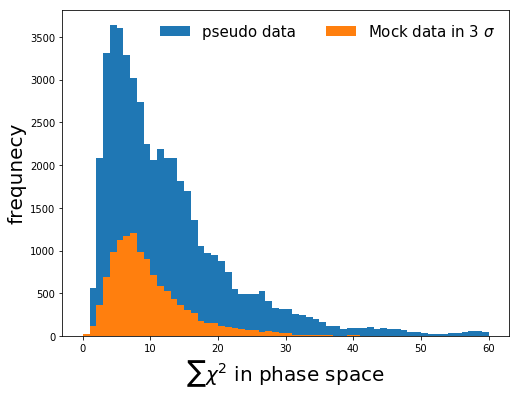

In [54]:
critiria = np.zeros(len(para_3_sigma))
critiria_pseudo = np.zeros(len(para_recovery))

for i in range(10):
    if i >=5 :
        critiria += (para_3_sigma[:,i+1]/np.std(para_3_sigma[:,i+1]) - np.average(para_3_sigma[:,i+1]/np.std(para_3_sigma[:,i+1])))**2
    else:
        critiria += (para_3_sigma[:,i]/np.std(para_3_sigma[:,i]) - np.average(para_3_sigma[:,i]/np.std(para_3_sigma[:,i])))**2


for i in range(10):
    if i >=5 :
        critiria_pseudo += (para_recovery[:,i]/np.std(para_3_sigma[:,i+1]) - np.average(para_3_sigma[:,i+1]/np.std(para_3_sigma[:,i+1])))**2
    else:
        critiria_pseudo += (para_recovery[:,i]/np.std(para_3_sigma[:,i]) - np.average(para_3_sigma[:,i]/np.std(para_3_sigma[:,i])))**2

fig = plt.figure(figsize=(8, 6))
bin_s = np.linspace(0,60,61)

plt.hist(critiria_pseudo, bins = bin_s, density = 0, label = "pseudo data")
plt.hist(critiria, bins = bin_s, density = 0, label = "Mock data in 3 $\sigma$")
# plt.hist(critiria_pseudo, bins = bin_s, density = 0, label = "pseudo data")

plt.xlabel("$\sum\chi^2$ in phase space", fontsize=20)
plt.ylabel("frequnecy", fontsize=20)

plt.legend(ncol=2,fontsize=15,framealpha=0)
plt.show()

## Cut in the $\sum \chi^2$ space
#### Here, let the cut = 30

In [61]:
para_recovery_cut = []

for i in range(len(para_recovery)):
    if critiria_pseudo[i] < 30:
        para_recovery_cut.append(para_recovery[i])

para_recovery_cut = np.array(para_recovery_cut)
critiria_2 = np.zeros(len(para_recovery_cut))

for i in range(10):
    if i >=5 :
        critiria_2 += (para_recovery_cut[:,i]/np.std(para_6_sigma[:,i+1]) - np.average(para_6_sigma[:,i+1]/np.std(para_6_sigma[:,i+1])))**2
    else:
        critiria_2 += (para_recovery_cut[:,i]/np.std(para_6_sigma[:,i]) - np.average(para_6_sigma[:,i]/np.std(para_6_sigma[:,i])))**2

print("# of pseudo data befor cut: {}".format(len(para_recovery)))
print("# of pseudo data after cut: {}".format(len(para_recovery_cut)))

# of pseudo data befor cut: 49187
# of pseudo data after cut: 45965


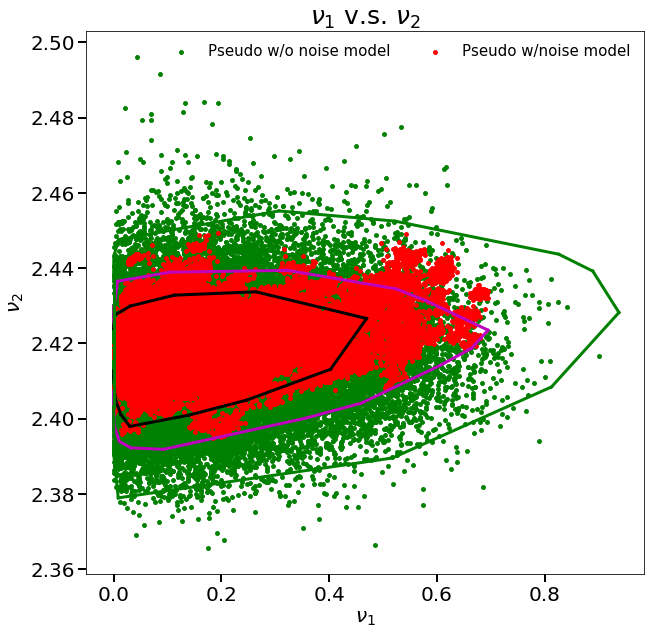

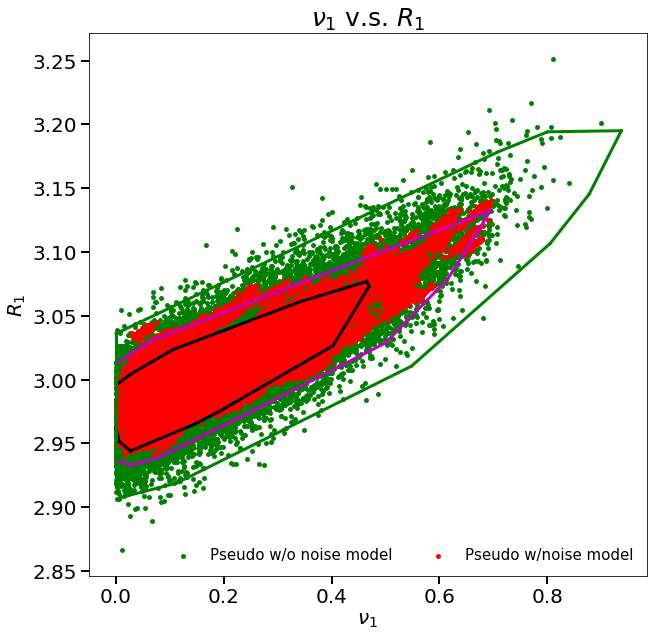

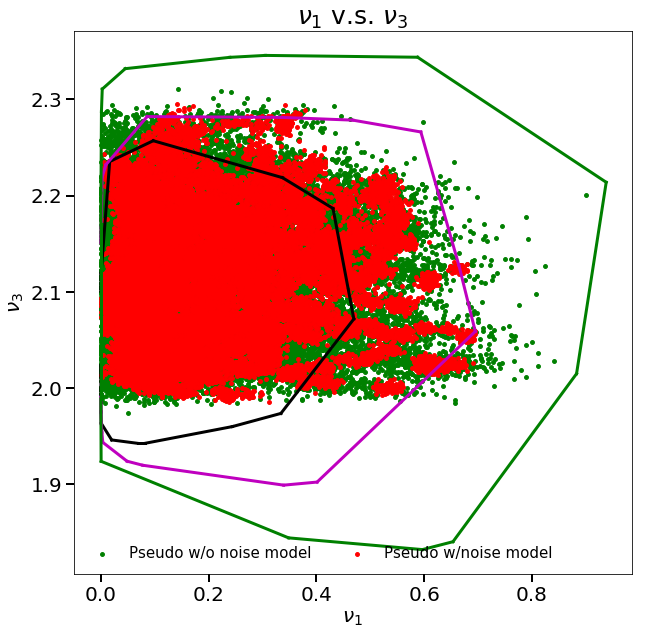

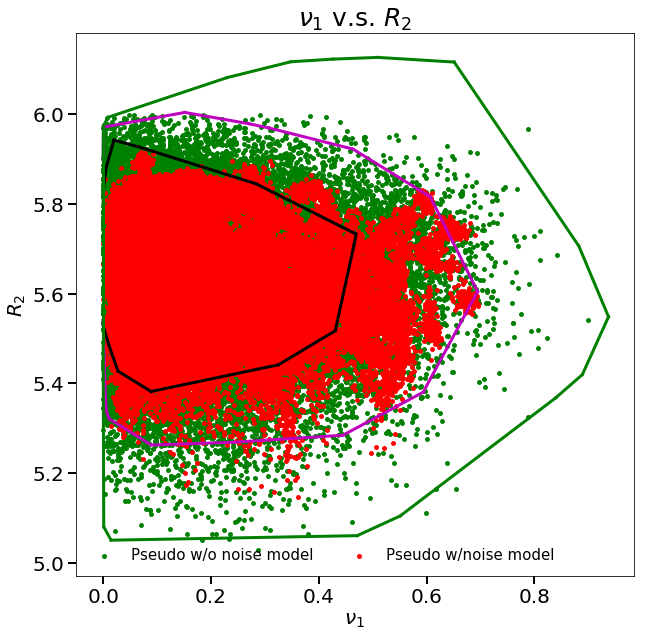

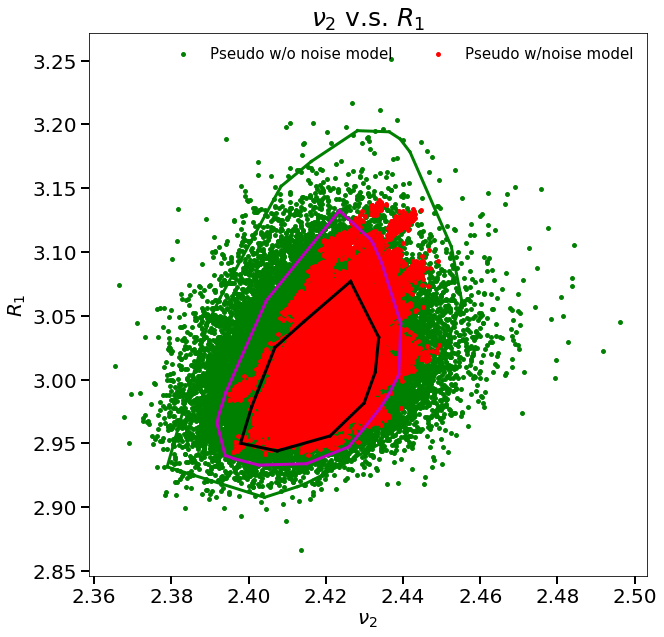

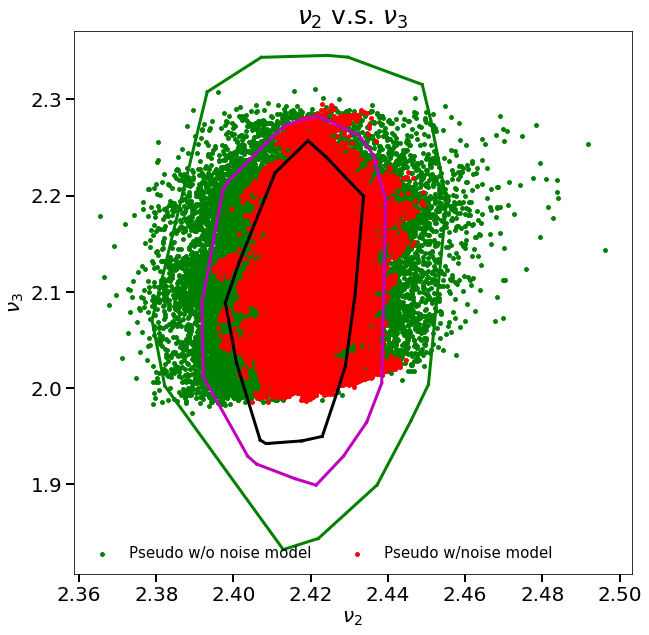

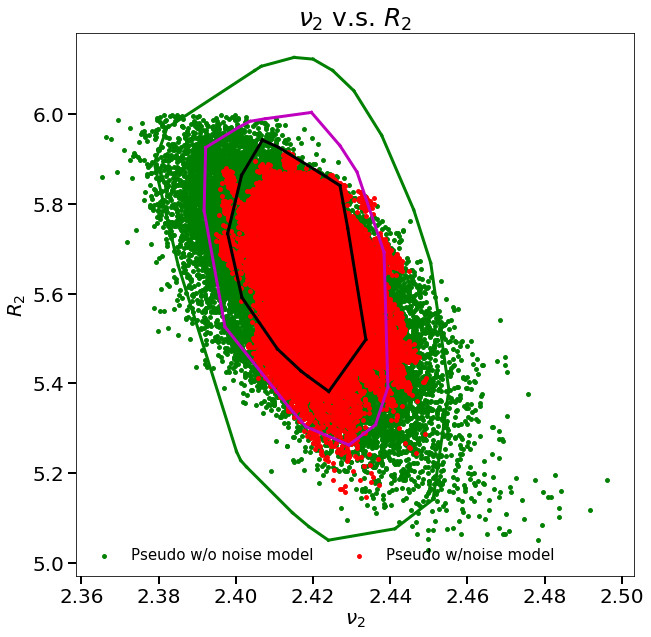

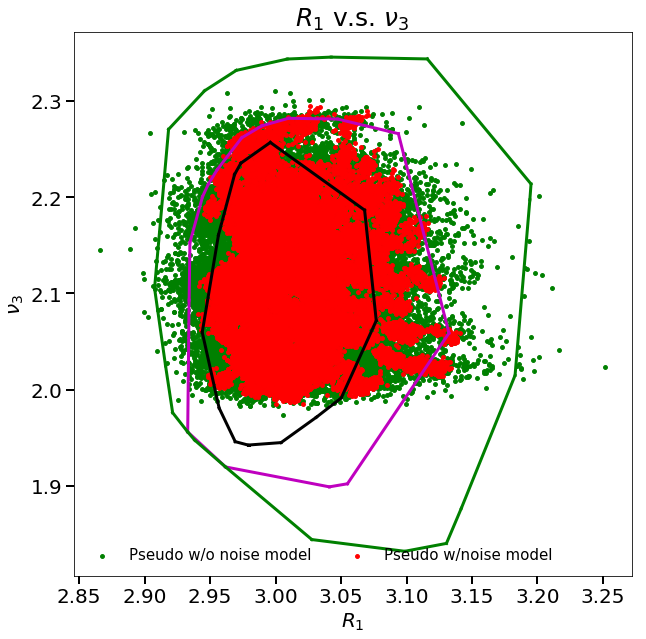

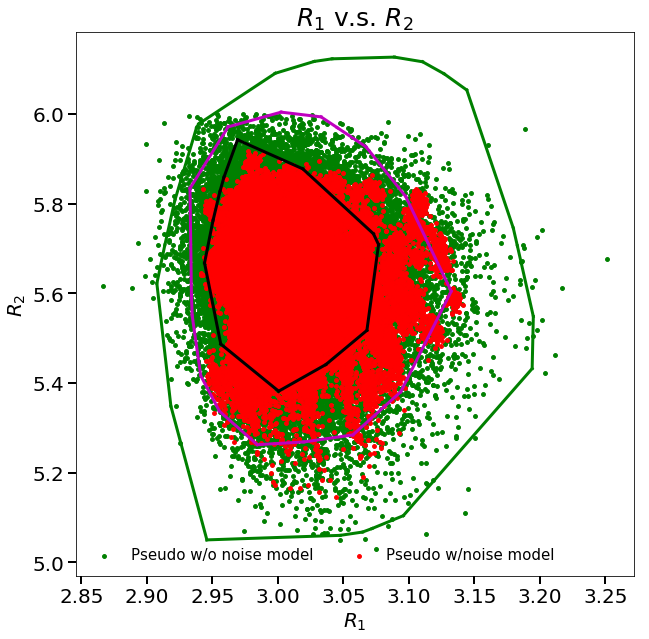

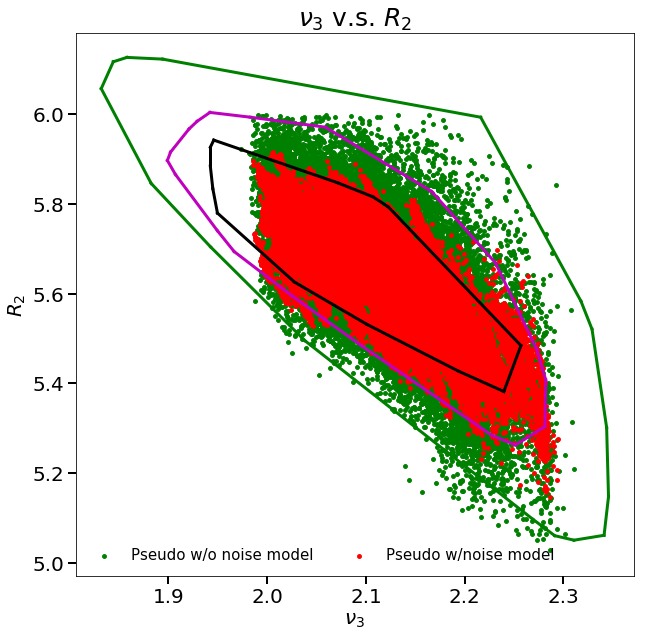

In [32]:
### drawing contour
from scipy.spatial import ConvexHull
def contour_total_drawing(para, predicted_para_1,predicted_para):
    for i in range(para+1,10):
        para_name = ["$\\nu_1$", "$\\nu_2$", "$R_1$", "$\\nu_3$", "$R_2$"]
#         para_name = [r"$D_0$X$10^{28}$", r"$\delta$", r"$Z_h$", r"$v_A$", r"$\eta$"]
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1,1)
        for label_i in ax.get_xticklabels(): 
            label_i.set_fontsize(20) 
        for label_i in ax.get_yticklabels(): 
            label_i.set_fontsize(20)
        plt.title(para_name[para-5]+" v.s. "+para_name[i-5], fontsize=25)
        plt.tick_params(which='both', width=2);plt.tick_params(which='major', length=8);plt.tick_params(which='minor', length=4, color='k')
        
        con_data_1 = np.zeros((len(para_1_sigma),2))
        con_data_1[:,0] = para_1_sigma[:,para+1]
        con_data_1[:,1] = para_1_sigma[:,i+1]
        con_data_2 = np.zeros((len(para_3_sigma),2))
        con_data_2[:,0] = para_3_sigma[:,para+1]
        con_data_2[:,1] = para_3_sigma[:,i+1]
        con_data_6 = np.zeros((len(para_6_sigma),2))
        con_data_6[:,0] = para_6_sigma[:,para+1]
        con_data_6[:,1] = para_6_sigma[:,i+1]
        con_data_total = np.zeros((len(parameter),2))
        con_data_total[:,0] = parameter[:,para+1]
        con_data_total[:,1] = parameter[:,i+1]
        hull_1 = ConvexHull(con_data_1)
        hull_2 = ConvexHull(con_data_2)
        hull_6 = ConvexHull(con_data_6)
        hull_total = ConvexHull(con_data_total)
        for simplex in hull_1.simplices:
            plt.plot(con_data_1[simplex, 0], con_data_1[simplex, 1], 'k-', linewidth=3)
        for simplex in hull_2.simplices:
            plt.plot(con_data_2[simplex, 0], con_data_2[simplex, 1], 'm-', linewidth=3)
        for simplex in hull_6.simplices:
            plt.plot(con_data_6[simplex, 0], con_data_6[simplex, 1], 'g-', linewidth=3)
#         for simplex in hull_total.simplices:
#             plt.plot(con_data_total[simplex, 0], con_data_total[simplex, 1], 'b-', linewidth=3)

#         index = 5
#         plt.scatter(para_1_sigma[:,para], para_1_sigma[:,i], s=3, c="k", label="1 $\sigma$ mock data")
        plt.scatter(predicted_para_1[:,para], predicted_para_1[:,i], s=15, c="g", label="Pseudo w/o noise model")
        plt.scatter(predicted_para[:,para], predicted_para[:,i], s=15, c="r", label="Pseudo w/noise model")
#         plt.scatter(np.average(para_3_sigma[:,para+1]), np.average(para_3_sigma[:,i+1]), s=15, c="k", label="Mean point")
#         plt.scatter(para_return_2[348,para], para_return_2[348,i+para+1], s=10, c="k", label="Mock Data")

#         plt.scatter(para_2_sigma[:,para], para_2_sigma[:,i+para+1], s=3, c="c", label="prediction")
#         plt.scatter(para_return_1[:,para], para_return_1[:,i+para+1], s=3, c="blue", label="prediction")

        plt.xlabel(para_name[para-5], fontsize=20)
        plt.ylabel(para_name[i-5], fontsize=20)
        plt.legend(ncol=2,fontsize=15,framealpha=0)
        
    plt.show()
for i in range(5,10):
    contour_total_drawing(i, para_recovery_1,para_recovery)
    

## Contour Plots needs to change to be readable

In [57]:
def contour_total_drawing(para, predicted_para_1, predicted_para):
    for i in range(para+1,10):
        fig = plt.figure(figsize=(10, 10))
        para_name = ["$\\nu_1$", "$\\nu_2$", "$R_1$", "$\\nu_3$", "$R_2$"]
        plt.title(para_name[para-5]+" v.s. "+para_name[i-5], fontsize=25)
        plt.tick_params(which='both', width=2);plt.tick_params(which='major', length=8);plt.tick_params(which='minor', length=4, color='k')


        plt.scatter(para_3_sigma[1354,para+1], para_3_sigma[1354,i+1], s=15, c="k", label="returm")
    
        plt.hist2d(para_1_sigma[:,para+1], para_1_sigma[:,i+1] , bins=50, cmap="OrRd",vmax=1,alpha = 0.2,label="$1\sigma$")
        plt.hist2d(para_3_sigma[:,para+1], para_3_sigma[:,i+1] , bins=50, cmap="Greys",vmax=1,alpha = 1,label="$3\sigma$")
        plt.hist2d(para_6_sigma[:,para+1], para_6_sigma[:,i+1] , bins=50, cmap="Greens",vmax=1,alpha = 0.2,label="$6\sigma$")
        plt.scatter(predicted_para_1[:,para], predicted_para_1[:,i], s=15, c="g", alpha = 0.1, label="Pseudo_1")
        plt.scatter(predicted_para[:,para], predicted_para[:,i], s=15, c="r", alpha = 0.1, label="Pseudo")
        
        
        deltax = max(para_6_sigma[:,para+1])-min(para_6_sigma[:,para+1])
        deltay = max(para_6_sigma[:,i+1])-min(para_6_sigma[:,i+1])

        plt.xlim(min(para_6_sigma[:,para+1])-deltax/10,max(para_6_sigma[:,para+1])+deltax/10)
        plt.ylim(min(para_6_sigma[:,i+1])-deltay/10,max(para_6_sigma[:,i+1])+deltay/10)
        plt.xlabel(para_name[para-5], fontsize=20)#,horizontalalignment='right',x=1)
        plt.ylabel(para_name[i-5], fontsize=20)#,horizontalalignment='right',y=1)
#         plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=15)  #para_6_sigma
        
        # plt.colorbar()    
        plt.show()
        
for i in range(5,10):
    contour_total_drawing(i, para_recovery, para_recovery_tmp)

NameError: name 'para_recovery_tmp' is not defined

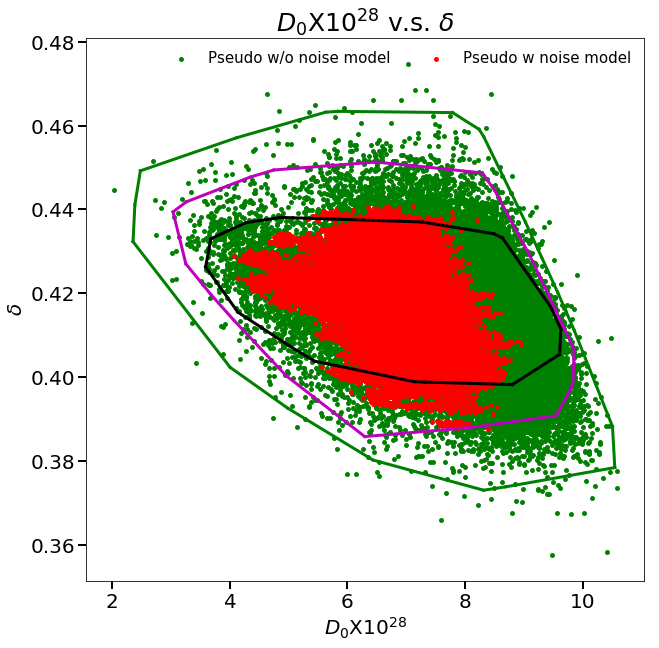

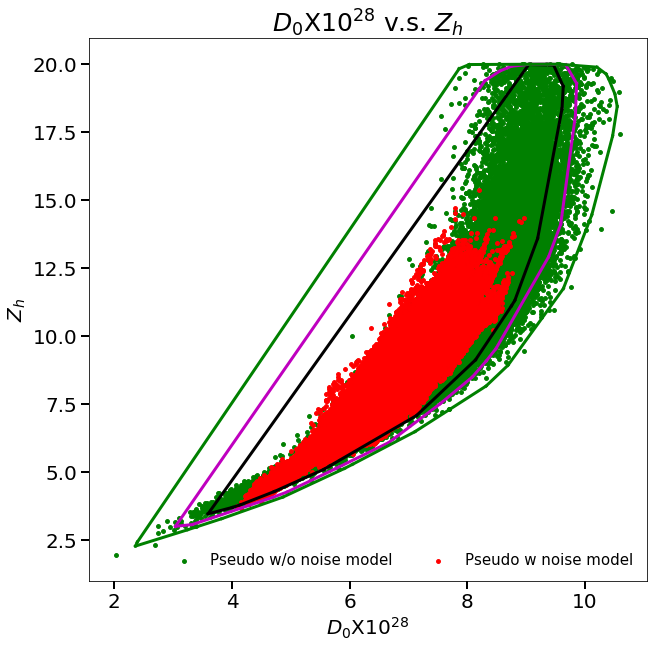

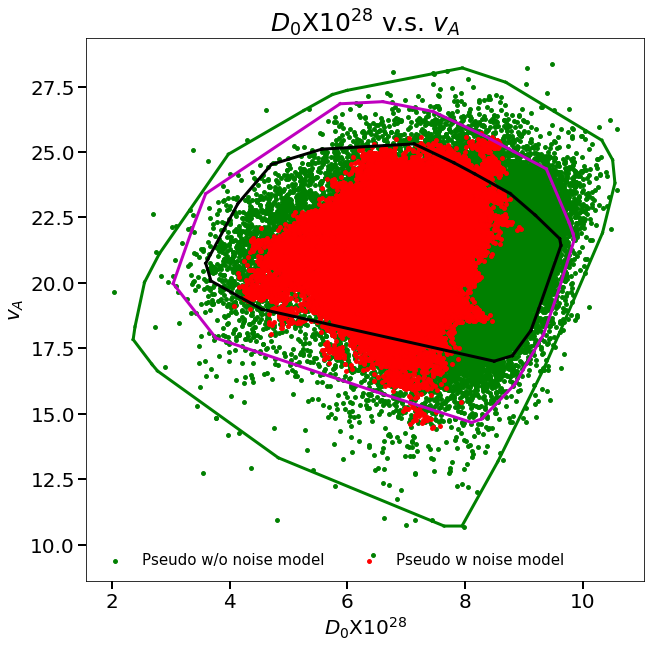

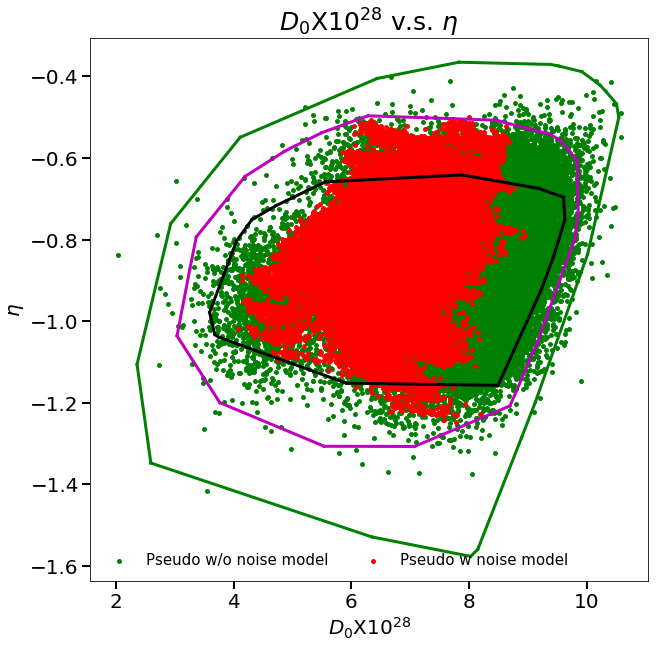

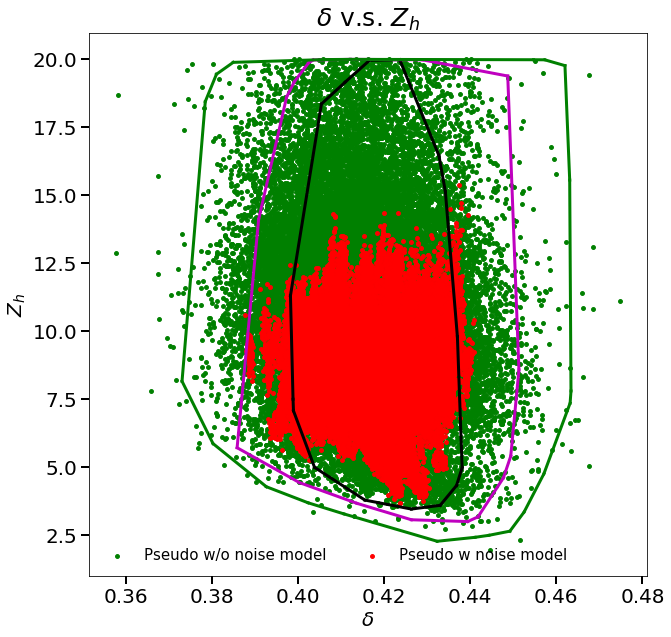

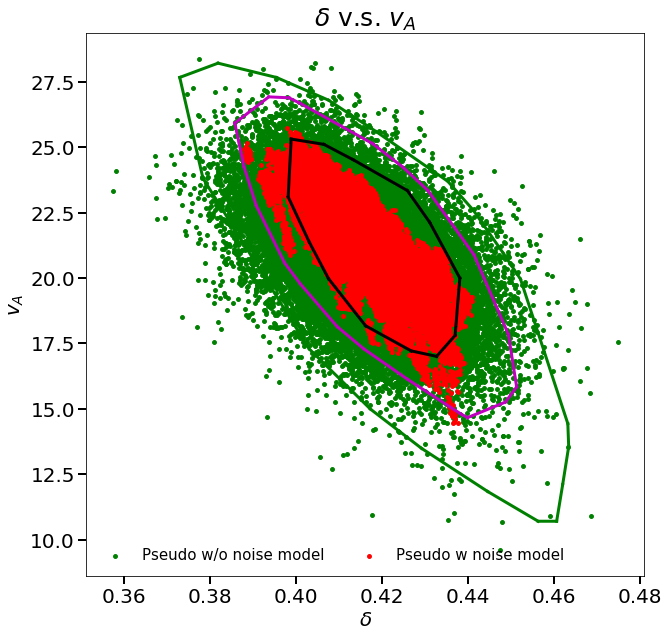

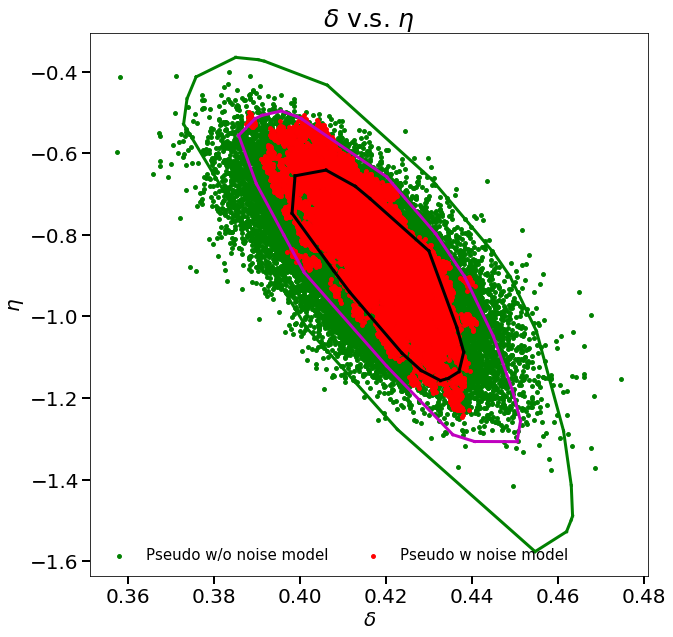

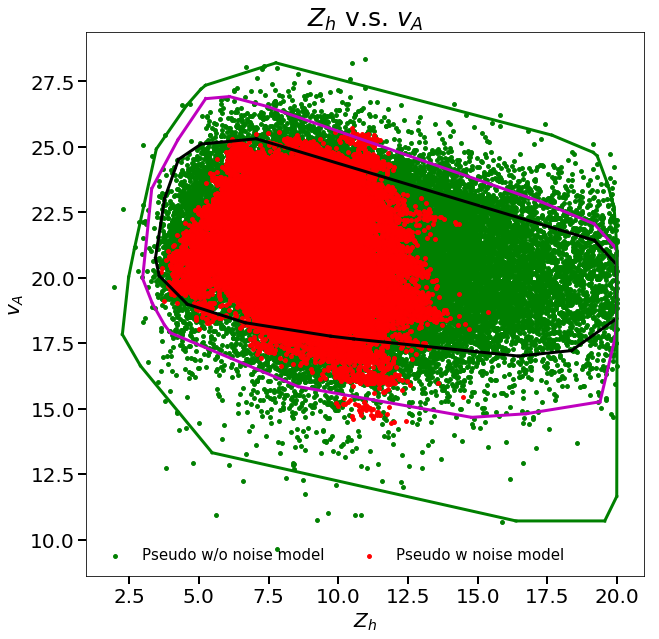

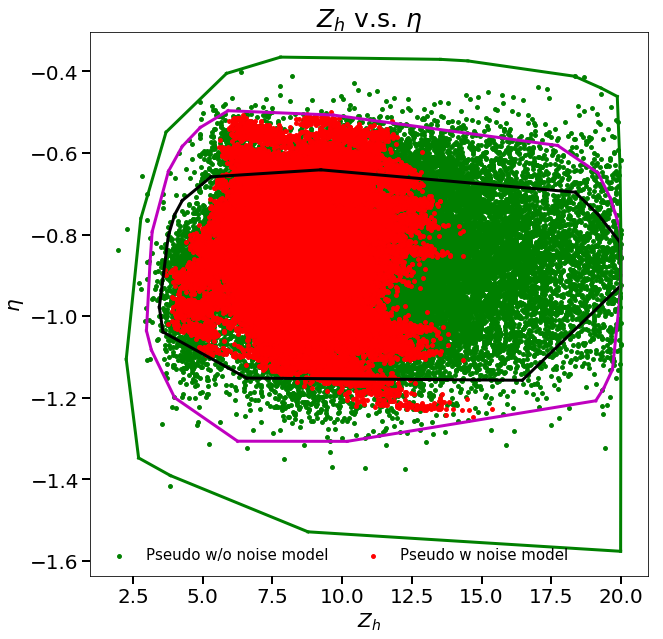

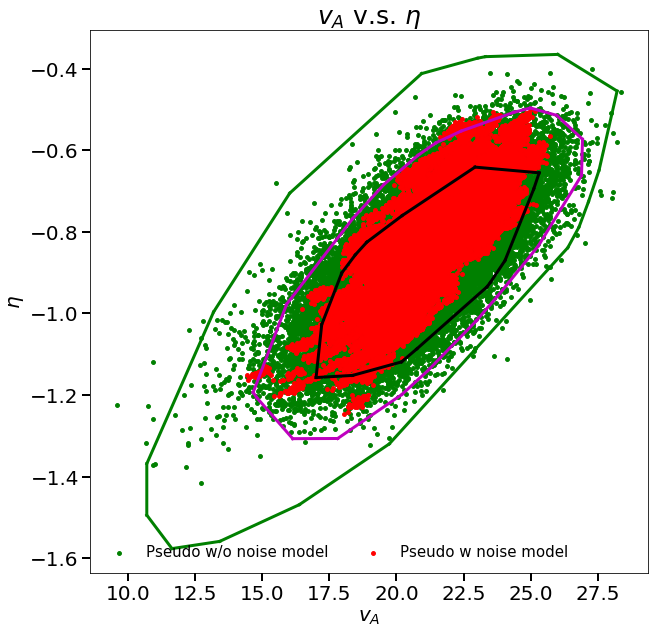

In [33]:
### drawing contour
from scipy.spatial import ConvexHull
def contour_total_drawing(para, predicted_para_1,predicted_para):
    for i in range(4-para):
        para_name = [r"$D_0$X$10^{28}$", r"$\delta$", r"$Z_h$", r"$v_A$", r"$\eta$"]
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1,1)
        for label_i in ax.get_xticklabels(): 
            label_i.set_fontsize(20) 
        for label_i in ax.get_yticklabels(): 
            label_i.set_fontsize(20)
        plt.title(para_name[para]+" v.s. "+para_name[i+para+1], fontsize=25)
        plt.tick_params(which='both', width=2);plt.tick_params(which='major', length=8);plt.tick_params(which='minor', length=4, color='k')

        con_data_1 = np.zeros((len(para_1_sigma),2))
        con_data_1[:,0] = para_1_sigma[:,para]
        con_data_1[:,1] = para_1_sigma[:,i+para+1]
        con_data_2 = np.zeros((len(para_3_sigma),2))
        con_data_2[:,0] = para_3_sigma[:,para]
        con_data_2[:,1] = para_3_sigma[:,i+para+1]
        con_data_6 = np.zeros((len(para_6_sigma),2))
        con_data_6[:,0] = para_6_sigma[:,para]
        con_data_6[:,1] = para_6_sigma[:,i+para+1]
        con_data_total = np.zeros((len(parameter),2))
        con_data_total[:,0] = parameter[:,para]
        con_data_total[:,1] = parameter[:,i+para+1]
        hull_1 = ConvexHull(con_data_1)
        hull_2 = ConvexHull(con_data_2)
        hull_6 = ConvexHull(con_data_6)
        hull_total = ConvexHull(con_data_total)
        for simplex in hull_1.simplices:
            plt.plot(con_data_1[simplex, 0], con_data_1[simplex, 1], 'k-', linewidth=3)
        for simplex in hull_2.simplices:
            plt.plot(con_data_2[simplex, 0], con_data_2[simplex, 1], 'm-', linewidth=3)
        for simplex in hull_6.simplices:
            plt.plot(con_data_6[simplex, 0], con_data_6[simplex, 1], 'g-', linewidth=3)
#         for simplex in hull_total.simplices:
#             plt.plot(con_data_total[simplex, 0], con_data_total[simplex, 1], 'b-', linewidth=3)
        
#         index = 5
#         plt.scatter(pppppp[5000:,para], pppppp[5000:,i+para+1], s=15, c="g", label="pseudo")
        plt.scatter(predicted_para_1[:,para], predicted_para_1[:,i+para+1], s=15, alpha = 1, c="g", label="Pseudo w/o noise model")
        plt.scatter(predicted_para[:,para], predicted_para[:,i+para+1], s=15, alpha = 1, c="red", label="Pseudo w noise model")
#         plt.scatter(predicted_para[77,para], predicted_para[77,i+para+1], s=3, c="red", label="prediction")
#         plt.scatter(np.average(para_3_sigma[:,para]), np.average(para_3_sigma[:,i+para+1]), s=15, c="k", label="mean point")
#         plt.scatter(para_2_sigma[:,para], para_2_sigma[:,i+para+1], s=3, c="c", label="prediction")
#         plt.scatter(para_return_1[:,para], para_return_1[:,i+para+1], s=3, c="blue", label="prediction")

        plt.xlabel(para_name[para], fontsize=20)
        plt.ylabel(para_name[i+para+1], fontsize=20)
        plt.legend(ncol=2,fontsize=15,framealpha=0)
        
    plt.show()
for i in range(4):
    contour_total_drawing(i, para_recovery_1,para_recovery)

## Contour Plots needs to change to be readable

In [499]:
# def contour_total_drawing(para, predicted_para):
#     for i in range(para+1,5):
#         fig = plt.figure(figsize=(10, 10))
#         para_name = [r"$D_0$X$10^{28}$", r"$\delta$", r"$Z_h$", r"$v_A$", r"$\eta$"]
#         plt.title(para_name[para]+" v.s. "+para_name[i], fontsize=25)
#         plt.tick_params(which='both', width=2);plt.tick_params(which='major', length=8);plt.tick_params(which='minor', length=4, color='k')
        
        
#         bin_size = 30
# #         plt.scatter(predicted_para[:,para], predicted_para[:,i], s=15, c="r", label="Pseudo")
# #         plt.scatter(para_3_sigma[:,para], para_3_sigma[:,i], s=15, c="k", label="Mock")
#         plt.hist2d(para_1_sigma[:,para], para_1_sigma[:,i] , bins=bin_size, cmap="OrRd",vmax=1,alpha = 0.2,label="$1\sigma$")
#         plt.hist2d(para_3_sigma[:,para], para_3_sigma[:,i] , bins=bin_size, cmap="Greys",vmax=1,alpha = 0.2,label="$3\sigma$")
#         plt.hist2d(para_6_sigma[:,para], para_6_sigma[:,i] , bins=bin_size, cmap="Greens",vmax=1,alpha = 0.2,label="$6\sigma$")


#         deltax = max(para_6_sigma[:,para])-min(para_6_sigma[:,para])
#         deltay = max(para_6_sigma[:,i])-min(para_6_sigma[:,i])

#         plt.xlim(min(para_6_sigma[:,para])-deltax/10,max(para_6_sigma[:,para])+deltax/10)
#         plt.ylim(min(para_6_sigma[:,i])-deltay/10,max(para_6_sigma[:,i])+deltay/10)
#         plt.xlabel(para_name[para], fontsize=20)
#         plt.ylabel(para_name[i], fontsize=20)
# #         plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=15)
#         # plt.colorbar()    
#         plt.show()
        
# for i in range(4):
#     contour_total_drawing(i, para_recovery)

# TBA

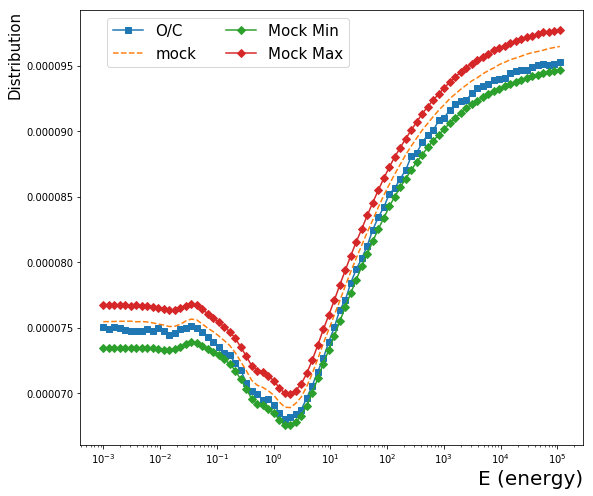

In [50]:
mock = np.zeros((2,84))
plt.figure(figsize=(9,8))
npseudo = index_new[0]
# for j in range(84):
#     mock[0,j] = min((data_1_sigma[index_1[:],j,5]/para_1_sigma[index_1[:],13])/(data_1_sigma[index_1[:],j,4]/data_1_sigma[index_1[:],52,4]))#/para_1_sigma[:,13])/data_1_sigma[:,j,4])
#     mock[1,j] = max((data_1_sigma[index_1[:],j,5]/para_1_sigma[index_1[:],13])/(data_1_sigma[index_1[:],j,4]/data_1_sigma[index_1[:],52,4]))#/para_1_sigma[:,13])/data_1_sigma[:,j,4])
for j in range(84):
    mock[0,j] = min((data_1_sigma[:,j,5]/para_1_sigma[:,13])/(data_1_sigma[:,j,4]/data_1_sigma[:,52,4]))#/para_1_sigma[:,13])/data_1_sigma[:,j,4])
    mock[1,j] = max((data_1_sigma[:,j,5]/para_1_sigma[:,13])/(data_1_sigma[:,j,4]/data_1_sigma[:,52,4]))#/para_1_sigma[:,13])/data_1_sigma[:,j,4])

#     plt.plot(spectrum_E[1,:], data[npseudo,:,i],"s-",label="pseudo")
plt.plot(pseudodata[0,:,0], (pseudodata[npseudo,:,5]/normalfactor[npseudo,13])/(pseudodata[npseudo,:,4]/pseudodata[npseudo,52,4]) ,"s-",label="O/C") #/normalfactor[npseudo,13])/pseudodata[npseudo,:,4]
# plt.plot(data_1_sigma[0,:,0], (data_1_sigma[index_1[0],:,5]/para_1_sigma[index_1[0],13])/(data_1_sigma[index_1][0,:,4]/data_1_sigma[index_1][0,52,4]),"--",label="mock")
plt.plot(data_1_sigma[0,:,0], (data_1_sigma[10,:,5]/para_1_sigma[10,13])/(data_1_sigma[10,:,4]/data_1_sigma[10,52,4]),"--",label="mock")

plt.plot(pseudodata[0,:,0], mock[0,:],"D-",label="Mock Min")
plt.plot(pseudodata[0,:,0], mock[1,:],"D-",label="Mock Max")
#     plt.ylim((2.5,3.5))
#     plt.xlim((0.01,1))

plt.xscale("log")
plt.xlabel('E (energy)', fontsize=20,horizontalalignment='right',x=1)
plt.ylabel("Distribution",fontsize=15,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(0.55, 1),ncol=2,fontsize=15)

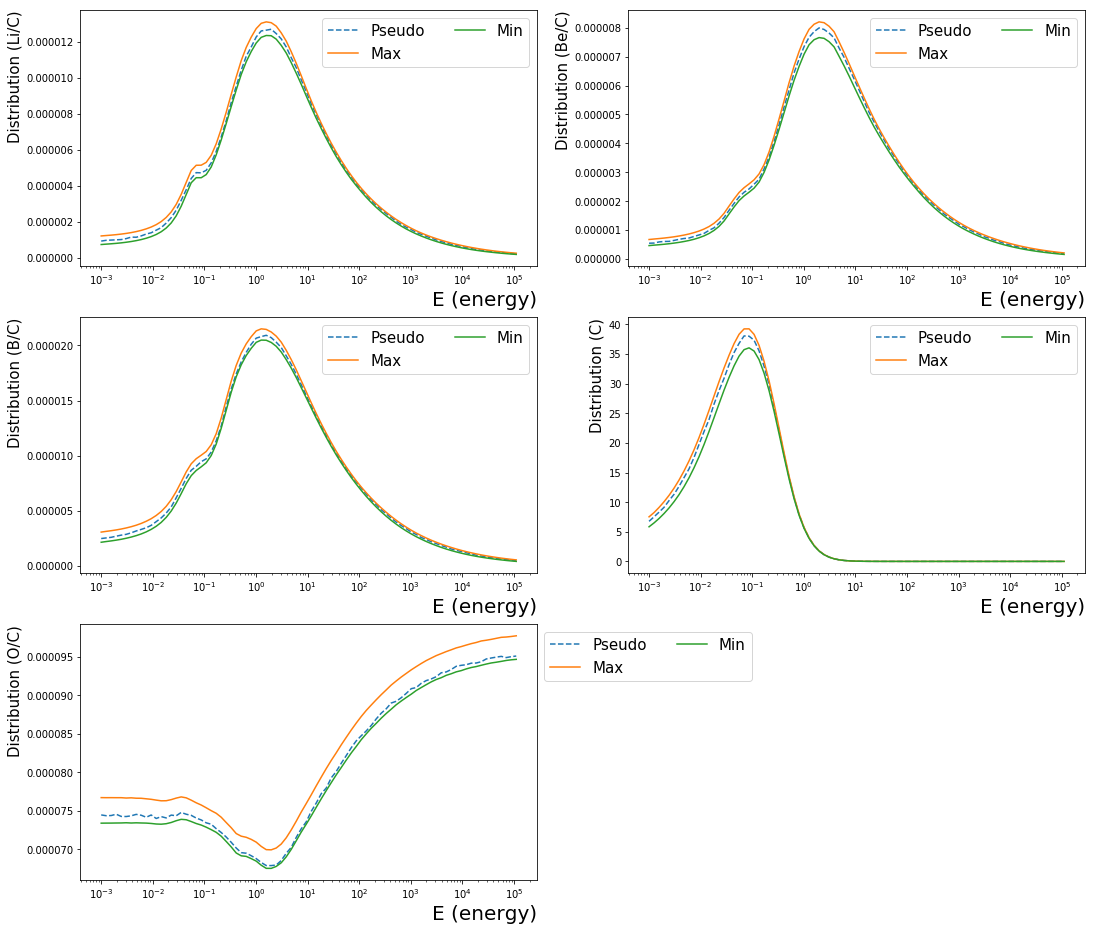

In [503]:
# normalfactor, pseudodata

npseudo = index_new[0]
total_data_divAp = np.zeros((data_1_sigma.shape[0], 84, 8))
for i in range(data_1_sigma.shape[0]):
    total_data_divAp[i,:,0] = (data_1_sigma[i,:,1]/para_1_sigma[i,11])/(data_1_sigma[i,:,4]/data_1_sigma[i,52,4]) # (Li/N_Li)/(C/C_109.5)
    total_data_divAp[i,:,1] = (data_1_sigma[i,:,2]/para_1_sigma[i,12])/(data_1_sigma[i,:,4]/data_1_sigma[i,52,4]) # (Be/N_Be)/(C/C_109.5)
    total_data_divAp[i,:,2] = data_1_sigma[i,:,3]/(data_1_sigma[i,:,4]/data_1_sigma[i,52,4]) # B/(C/C_109.5)

    total_data_divAp[i,:,3] = (data_1_sigma[i,:,1]/para_1_sigma[i,11])/(data_1_sigma[i,:,5]/para_1_sigma[i,13]) # (Li/N_Li)/(O/N_O)
    total_data_divAp[i,:,4] = (data_1_sigma[i,:,2]/para_1_sigma[i,12])/(data_1_sigma[i,:,5]/para_1_sigma[i,13]) # (Be/N_Be)/(O/N_O)
    total_data_divAp[i,:,5] = data_1_sigma[i,:,3]/(data_1_sigma[i,:,5]/para_1_sigma[i,13]) # B/(O/N_O)

    total_data_divAp[i,:,6] = data_1_sigma[i,:,4] # C
    total_data_divAp[i,:,7] = (data_1_sigma[i,:,5]/para_1_sigma[i,13])/(data_1_sigma[i,:,4]/data_1_sigma[i,52,4])  # (O/N_O)/(C/C_109.5)

pseudodata_divAp = np.zeros((pseudodata.shape[0], 84, 5))
for i in range(pseudodata.shape[0]):
    pseudodata_divAp[i,:,0] = (pseudodata[i,:,1]/normalfactor[i,11])/(pseudodata[i,:,4]/pseudodata[i,52,4]) # (Li/N_Li)/(C/C_109.5)
    pseudodata_divAp[i,:,1] = (pseudodata[i,:,2]/normalfactor[i,12])/(pseudodata[i,:,4]/pseudodata[i,52,4]) # (Be/N_Be)/(C/C_109.5)
    pseudodata_divAp[i,:,2] = pseudodata[i,:,3]/(pseudodata[i,:,4]/pseudodata[i,52,4]) # B/(C/C_109.5)
    pseudodata_divAp[i,:,3] = pseudodata[i,:,4] # C
    pseudodata_divAp[i,:,4] = (pseudodata[i,:,5]/normalfactor[i,13])/(pseudodata[i,:,4]/pseudodata[i,52,4])  # (O/N_O)/(C/C_109.5)
    
    
divAp_pack = np.zeros((2, 84, 8))
for i in range(8):
    for j in range(84):
        divAp_pack[0,j,i] = max(total_data_divAp[:,j,i])
        divAp_pack[1,j,i] = min(total_data_divAp[:,j,i])
list = ["Li/C","Be/C","B/C","C","O/C"]
plt.figure(figsize=(18,16))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(pseudodata[0,:,0], pseudodata_divAp[npseudo,:,i] ,"--",label="Pseudo")
    
    if i > 2:
        k = i+3
    else:
        k = i
#     print("k",k)
    plt.plot(pseudodata[0,:,0], divAp_pack[0,:,k],"-",label="Max")
    plt.plot(pseudodata[0,:,0], divAp_pack[1,:,k],"-",label="Min")
#     plt.plot(total_data[0,:,0], total_data_divAp[2,:,k],"D-",label="mock")
#     plt.ylim((0.000010,0.000013))
#     plt.xlim((0.5,2))

    plt.xscale("log")
    plt.xlabel('E (energy)', fontsize=20,horizontalalignment='right',x=1)
    plt.ylabel("Distribution ("+list[i] +")",fontsize=15,horizontalalignment='right',y=1)
    plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=15)

In [504]:
# # ax = fig.add_subplot(1,1,1)
# x = np.linspace(0.0, 1.0, 50)
# y = np.linspace(2.35, 2.5, 50)
# sigma_1 = ax.hist2d(para_1_sigma[:,6], para_1_sigma[:,7] , bins=(x,y), cmap="Oranges")
# sigma_3 = ax.hist2d(para_3_sigma[:,6], para_3_sigma[:,7] , bins=(x,y), cmap="Oranges")
# sigma_6 = ax.hist2d(para_6_sigma[:,6], para_6_sigma[:,7] , bins=(x,y), cmap="Oranges")

# width, length = len(x), len(y)
# plot_1, plot_3, plot_6 = np.zeros((width, length)), np.zeros((width, length)), np.zeros((width, length))

# sigma = [sigma_1,sigma_3,sigma_6]
# plots = [plot_1,plot_3,plot_6]

# for k, element in enumerate(sigma):
#     for (i, j), z in np.ndenumerate(element[0]):
#         if z > 0:
#             plots[k][i,j] = 1

# plot_new = []
# for i, element in enumerate(plots):
#     element_tmp = np.zeros((width, length))
#     for j in range(width):
#         element_tmp[j] = np.transpose(element)[width-1-j]    
#     plot_new.append(element_tmp)

# plt.figure(figsize=(10, 10))
# plt.imshow(plot_new[0],cmap="Greys",alpha = 0.1)
# plt.imshow(plot_new[1],cmap="Oranges",alpha = 0.1)
# plt.imshow(plot_new[2],cmap="Greens",alpha = 0.1)
# # plt.xticks(range(p_6.shape[1]), np.round(ppp[1],2), fontsize=15)
# # plt.yticks(range(p_6.shape[1]), np.round(ppp[2],2), fontsize=15)
# # plt.xticks(ppp[1])
# plt.show()

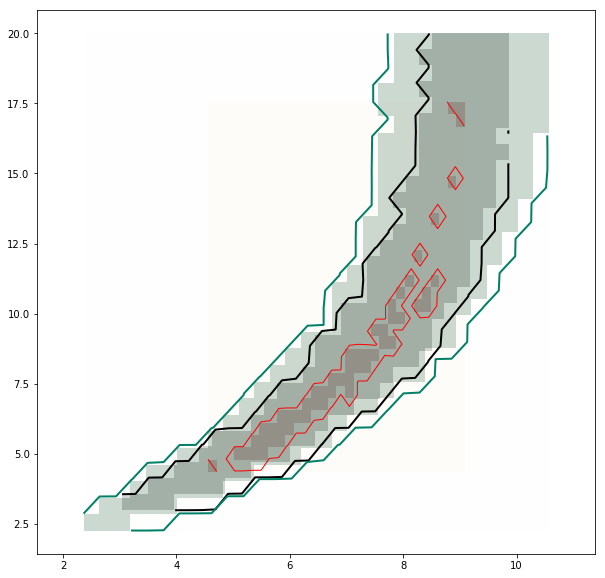

In [26]:
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(1,1,1)

bin_size = 30
sigma_1 = plt.hist2d(para_1_sigma[:,0], para_1_sigma[:,2] , bins=bin_size, cmap="OrRd",vmax=1,alpha = 0.2,label="$1\sigma$")
sigma_2 = plt.hist2d(para_3_sigma[:,0], para_3_sigma[:,2] , bins=bin_size, cmap="Greys",vmax=1,alpha = 0.2,label="$3\sigma$")
sigma_3 = plt.hist2d(para_6_sigma[:,0], para_6_sigma[:,2] , bins=bin_size, cmap="Greens",vmax=1,alpha = 0.2,label="$6\sigma$")

deltax = max(para_6_sigma[:,0])-min(para_6_sigma[:,2])
deltay = max(para_6_sigma[:,0])-min(para_6_sigma[:,2])

plt.xlim(min(para_6_sigma[:,0])-deltax/10,max(para_6_sigma[:,0])+deltax/10)
plt.ylim(min(para_6_sigma[:,2])-deltay/10,max(para_6_sigma[:,2])+deltay/10)
plt.contour(sigma_1[0].transpose(),extent=[sigma_1[1][0],sigma_1[1][-1],sigma_1[2][0],sigma_1[2][-1]],
            linewidths=1, 
            levels = [0.1],
            cmap="autumn",
            extend = "max",
            corner_mask = 1
           )
plt.contour(sigma_2[0].transpose(),extent=[sigma_2[1][0],sigma_2[1][-1],sigma_2[2][0],sigma_2[2][-1]],linewidths=2, levels = [0.1],cmap="gist_gray")

plt.contour(sigma_3[0].transpose(),extent=[sigma_3[1][0],sigma_3[1][-1],sigma_3[2][0],sigma_3[2][-1]],linewidths=2, levels = [0.1],cmap="summer")
plt.show()
# print(ppp[0])
# print(ppp[0].transpose())